# Objective
The objective of the German Credit Data is to minimize the chances of issuing risky loans to applicants
while maximizing the chances of profiting from good loans. An applicant’s demographic and socio-economic 
profiles are considered by loan managers before a decision is taken regarding his/her loan application.

The German Credit data set is a publically available data set downloaded from the UCI Machine Learning Repository.
The German Credit Data contains data on 20 variables and the classification of whether an applicant is considered 
a Good or Bad credit risk for 1000 loan applicants. The task requires exploring the data and building a predictive 
model to provide a bank manager guidance for making a decision on whether to approve a loan to a prospective 
applicant based on his/her profile.

For this case study, I used a simplified version of the original dataset that only has 10 variables.







## Importing the Required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
credit_df = pd.read_csv('german_credit_data.csv')

In [3]:
credit_df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# Check the number of rows and columns
credit_df.shape

(1000, 11)

## Data Preprocessing Steps

In [5]:
# Check for missing values
credit_df.isnull().sum()

# Observation: There are missing values in 'Saving accounts' and 'Checking account' columns

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
# basic data information
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# statistical summary of the dataframe

credit_df.describe()

# Obervation:
#The average age rounded up is 36
#The average duration rounded up is 21
#The age range is from 19 to 75 years
#The range of credit in Deutschmark (DM) is from 250 to 18424





,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
# handling missing values in the 'Saving accounts' column
credit_df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [9]:
credit_df['Saving accounts'] = credit_df['Saving accounts'].fillna('little')

In [10]:
credit_df['Checking account'].value_counts()

# drop the column 'Checking account' as more than 25% missing values are there

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [11]:
credit_df = credit_df.drop(['Checking account'], axis = 1)

In [12]:
credit_df.isnull().sum()

Unnamed: 0         0
Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64

In [57]:
credit_df['Job'].value_counts()

# Observation: 'Job' column seems to have some ordinal data

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [13]:
# check the description for the char/object variables
credit_df.describe(include = ['O'])

,Sex,Housing,Saving accounts,Purpose,Risk
count,1000,1000,1000,1000,1000
unique,2,3,4,8,2
top,male,own,little,car,good
freq,690,713,786,337,700


## EDA

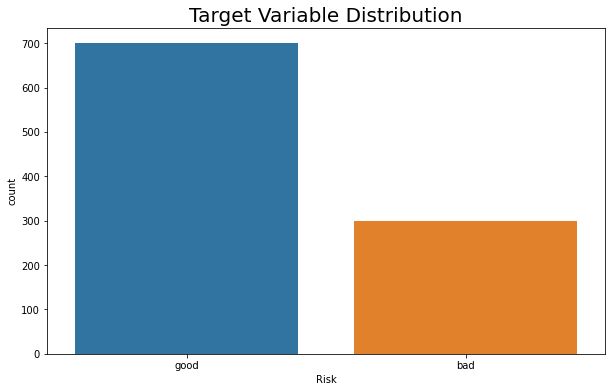

In [14]:
# Target Variable distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x="Risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

In [15]:
credit_df['Risk'].value_counts()

# Observation:
# There are 700 instances where an applicant was classified as good
# There are 300 instances where an applicant was classified as bad


good    700
bad     300
Name: Risk, dtype: int64

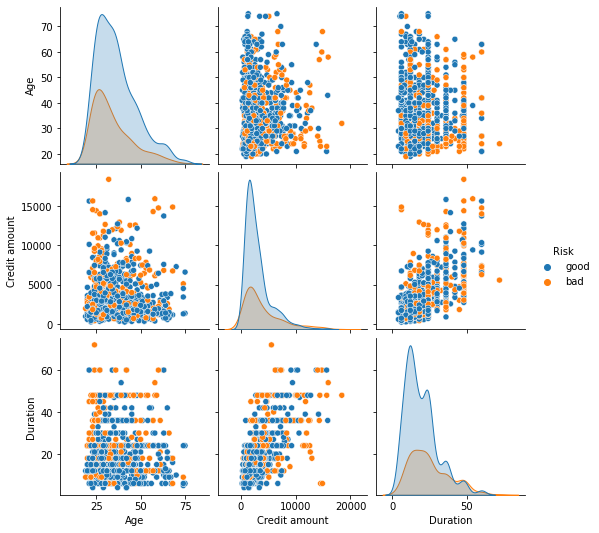

In [16]:
# Pairplot for numerical variables
num_cat_risk = ['Age', 'Credit amount', 'Duration', 'Risk']
sns.pairplot(credit_df[num_cat_risk], hue="Risk")
plt.show()

# Observation:
#The distribution plots for Age, Credit amount, and Duration have a positive skew


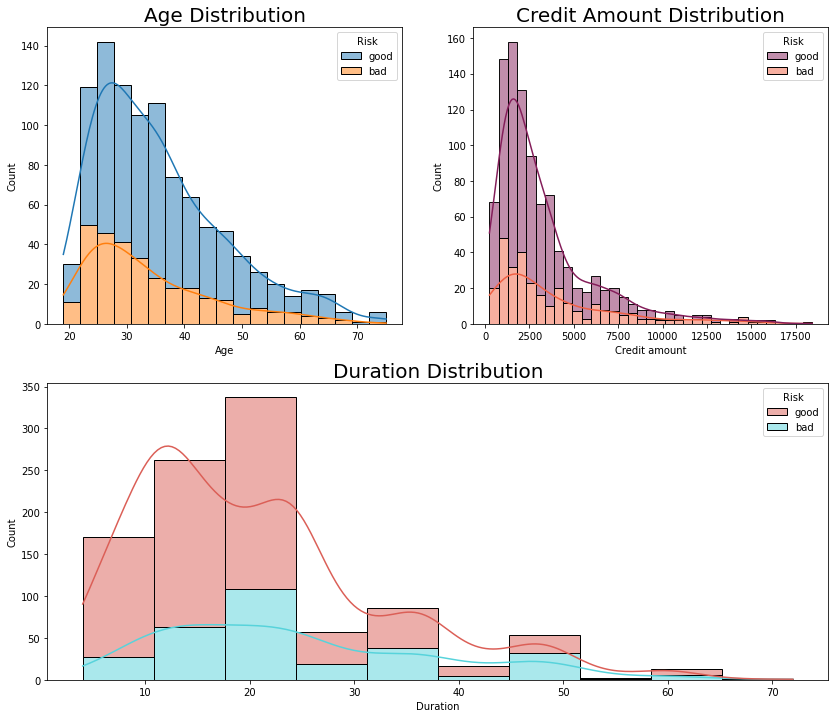

In [17]:
# Age distribution
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=credit_df, x='Age', hue='Risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=credit_df, x='Credit amount', hue='Risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=credit_df, x='Duration', hue='Risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

# Observation:
#All graphs have a positive skew indicating that the mean is greater than the median
#Applicants between the ages of 20 to 30 are more likely to apply for a loan
#Applicants are less likely to apply for a high credit loan
#More loans have been paid off around 20 months after being issued
#The bank is more likely to receive applicants between the ages of 20 and 30 and request loans between 250 and 2500 DM



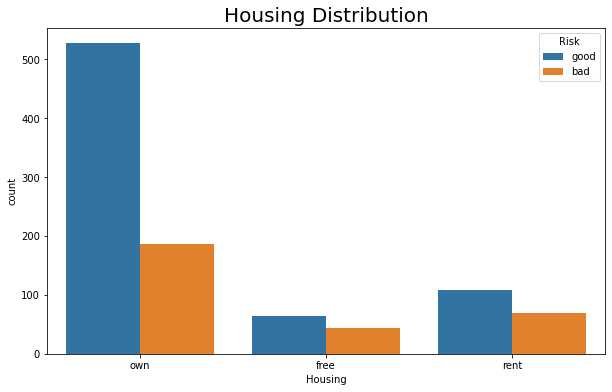

In [18]:
# Housing Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x='Housing', hue='Risk')
plt.title("Housing Distribution", fontsize=20)
plt.show()

# Observation:
#Most applicants own a house
#Over half of the applicants who own a house classified as good


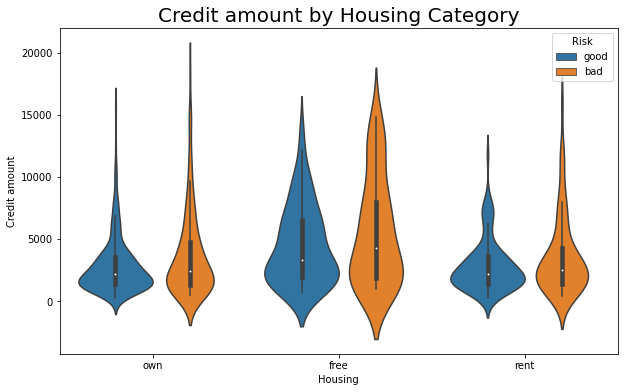

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=credit_df, x='Housing', y='Credit amount', hue='Risk')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()

#The density curves from the violin plot suggest that there is a higher frequency of applicants 
#with credit amounts below 5,000 DM


Text(0.5, 1.0, 'Job Category by Gender')

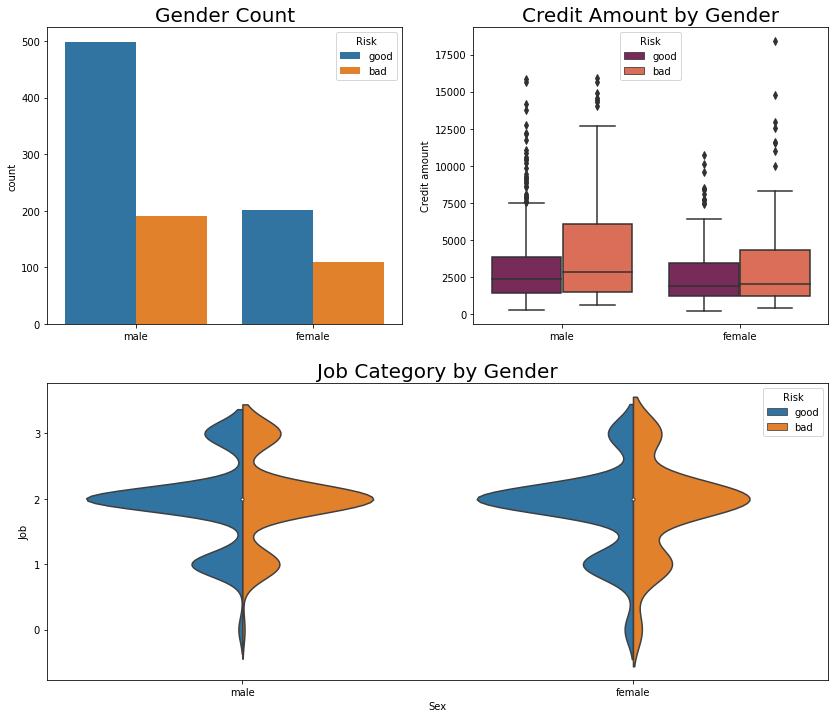

In [20]:
# Distribution by Gender
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x='Sex', hue='Risk', palette='tab10')
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_df, x='Sex', y='Credit amount', palette='rocket', hue='Risk')
ax2.set_title("Credit Amount by Gender", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.violinplot(data=credit_df, x='Sex', y='Job', hue='Risk', split=True)
ax3.set_title("Job Category by Gender", fontsize=20)


#There are 2x more male applicants than females in the data
#The majority of applicants are in the skilled job category
#About 2/5 of male applicants and 1/3 of female applicants are classified as bad
#The density distribution from the violin plots follows the same trend suggesting that the majority 
#of the male and female applicants are categorized as skilled workers


In [21]:
credit_df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,5951,48,radio/TV,bad
2,2,49,male,1,own,little,2096,12,education,good
3,3,45,male,2,free,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,4870,24,car,bad


In [22]:
# dropping the column 'Unnamed: 0' as it is a non significant column
credit_df = credit_df.drop(['Unnamed: 0'], axis = 1)

In [23]:
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,1169,6,radio/TV,good
1,22,female,2,own,little,5951,48,radio/TV,bad
2,49,male,1,own,little,2096,12,education,good
3,45,male,2,free,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,4870,24,car,bad


## Feature Encoding

In [24]:
credit_df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [25]:
# Sex
credit_df['Sex'] = credit_df['Sex'].astype('category')
credit_df['Sex'] = credit_df['Sex'].cat.codes

In [26]:
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,little,1169,6,radio/TV,good
1,22,0,2,own,little,5951,48,radio/TV,bad
2,49,1,1,own,little,2096,12,education,good
3,45,1,2,free,little,7882,42,furniture/equipment,good
4,53,1,2,free,little,4870,24,car,bad


In [27]:
#Housing
credit_df['Housing'] = credit_df['Housing'].astype('category')
credit_df['Housing'] = credit_df['Housing'].cat.codes
credit_df = pd.get_dummies(credit_df, columns = ['Housing'], drop_first = True)

In [28]:
credit_df.head()

,Age,Sex,Job,Saving accounts,Credit amount,Duration,Purpose,Risk,Housing_1,Housing_2
0,67,1,2,little,1169,6,radio/TV,good,1,0
1,22,0,2,little,5951,48,radio/TV,bad,1,0
2,49,1,1,little,2096,12,education,good,1,0
3,45,1,2,little,7882,42,furniture/equipment,good,0,0
4,53,1,2,little,4870,24,car,bad,0,0


In [29]:
#Saving accounts
credit_df['Saving accounts'] = credit_df['Saving accounts'].astype('category')
credit_df['Saving accounts'] = credit_df['Saving accounts'].cat.codes
credit_df = pd.get_dummies(credit_df, columns = ['Saving accounts'], drop_first = True)

In [30]:
credit_df.head()

,Age,Sex,Job,Credit amount,Duration,Purpose,Risk,Housing_1,Housing_2,Saving accounts_1,Saving accounts_2,Saving accounts_3
0,67,1,2,1169,6,radio/TV,good,1,0,0,0,0
1,22,0,2,5951,48,radio/TV,bad,1,0,0,0,0
2,49,1,1,2096,12,education,good,1,0,0,0,0
3,45,1,2,7882,42,furniture/equipment,good,0,0,0,0,0
4,53,1,2,4870,24,car,bad,0,0,0,0,0


In [31]:
#Purpose
credit_df['Purpose'].value_counts()


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [32]:
credit_df['Purpose'] = credit_df['Purpose'].astype('category')
credit_df['Purpose'] = credit_df['Purpose'].cat.codes
credit_df = pd.get_dummies(credit_df, columns = ['Purpose'], drop_first = True)

In [58]:
credit_df = pd.get_dummies(credit_df, columns = ['Job'], drop_first = True)

In [59]:
credit_df.head()


,Age,Sex,Credit amount,Duration,Risk,Housing_1,Housing_2,Saving accounts_1,Saving accounts_2,Saving accounts_3,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Job_1,Job_2,Job_3
0,67,1,1169,6,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,22,0,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,45,1,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,53,1,4870,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
#Risk
credit_df['Risk'] = credit_df['Risk'].astype('category')
credit_df['Risk'] = credit_df['Risk'].cat.codes

In [60]:
credit_df.head()

,Age,Sex,Credit amount,Duration,Risk,Housing_1,Housing_2,Saving accounts_1,Saving accounts_2,Saving accounts_3,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Job_1,Job_2,Job_3
0,67,1,1169,6,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,22,0,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,45,1,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,53,1,4870,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [36]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1000 non-null   int64
 1   Sex                1000 non-null   int8 
 2   Job                1000 non-null   int64
 3   Credit amount      1000 non-null   int64
 4   Duration           1000 non-null   int64
 5   Risk               1000 non-null   int8 
 6   Housing_1          1000 non-null   uint8
 7   Housing_2          1000 non-null   uint8
 8   Saving accounts_1  1000 non-null   uint8
 9   Saving accounts_2  1000 non-null   uint8
 10  Saving accounts_3  1000 non-null   uint8
 11  Purpose_1          1000 non-null   uint8
 12  Purpose_2          1000 non-null   uint8
 13  Purpose_3          1000 non-null   uint8
 14  Purpose_4          1000 non-null   uint8
 15  Purpose_5          1000 non-null   uint8
 16  Purpose_6          1000 non-null   uint8
 17  Purpose_7      

In [62]:
# Split the Independent(x) and Dependent(y) variable
x = credit_df.drop(['Risk'], axis = 1)
y = credit_df['Risk']

In [63]:
x.head()

,Age,Sex,Credit amount,Duration,Housing_1,Housing_2,Saving accounts_1,Saving accounts_2,Saving accounts_3,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Job_1,Job_2,Job_3
0,67,1,1169,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,22,0,5951,48,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,49,1,2096,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,45,1,7882,42,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,53,1,4870,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [64]:
x.shape

(1000, 19)

In [65]:
y.head()


0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int8

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101) 

print('x train : ', x_train.shape)
print('x test : ', x_test.shape)
print('y train : ', y_train.shape)
print('y test : ', y_test.shape)

x train :  (800, 19)
x test :  (200, 19)
y train :  (800,)
y test :  (200,)


## Building Logistic Regression Model


In [67]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred_test = logit_model.predict(x_test)

In [44]:
y_pred_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int8)

In [69]:
y_pred_train = logit_model.predict(x_train)

## Model Evaluation

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [70]:
print(confusion_matrix(y_test, y_pred_test))

[[ 13  56]
 [  7 124]]


In [71]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.19      0.29        69
           1       0.69      0.95      0.80       131

    accuracy                           0.69       200
   macro avg       0.67      0.57      0.54       200
weighted avg       0.68      0.69      0.62       200



In [72]:
print(accuracy_score(y_test, y_pred_test))

0.685


In [73]:
# Train data
print(accuracy_score(y_train, y_pred_train))

0.72375


In [51]:
# Training accuracy:73%
# Test accuracy:68%

In [74]:
# Getting the threshold value for roc-auc
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test,y_pred_test)
logistic_roc_auc

0.5674853412988162

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.       , 0.8115942, 1.       ])

array([0.        , 0.94656489, 1.        ])

array([2, 1, 0], dtype=int8)

## Plot the ROC and AUC Curve

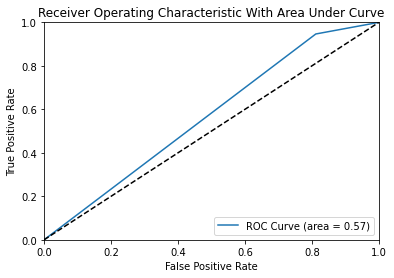

In [76]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic With Area Under Curve')
plt.legend(loc = 'lower right')
plt.show()

## Using K fold method to improve the accuracy

In [77]:
from sklearn.model_selection import cross_val_score

accuracy_train = cross_val_score(logit_model, x_train, y_train, cv=20)
accuracy_test = cross_val_score(logit_model, x_test, y_test, cv=20)

print('Train accuracy : ', accuracy_train)
print('###'*30)
print('Test accuracy : ', accuracy_test)

Train accuracy :  [0.8   0.7   0.725 0.725 0.7   0.725 0.75  0.7   0.725 0.75  0.7   0.775
 0.675 0.7   0.8   0.65  0.7   0.7   0.675 0.725]
##########################################################################################
Test accuracy :  [0.7 0.7 0.8 0.5 0.6 0.5 0.6 0.7 0.8 0.7 0.8 0.7 0.8 0.7 0.5 0.7 0.9 0.5
 0.6 0.7]


In [78]:
print('Train accuracy : ', accuracy_train[0])
print('###'*20)
print('Test accuracy : ', accuracy_test[16])

Train accuracy :  0.8
############################################################
Test accuracy :  0.9
